In [1]:
import numpy as np
import os
import shutil

import IPython
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split

%matplotlib inline
matplotlib.style.use('ggplot')

print('package done!')

package done!


# Explore The Datasets

In [2]:
meta_data = pd.read_csv("E:/Urban Sound/UrbanSound8k.csv")
meta_data[:10]

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [3]:
dff =  meta_data.drop(['fsID', 'start', 'end', 'salience', 'classID'], axis = 1)
dff.head()

,slice_file_name,fold,class
0,100032-3-0-0.wav,5,dog_bark
1,100263-2-0-117.wav,5,children_playing
2,100263-2-0-121.wav,5,children_playing
3,100263-2-0-126.wav,5,children_playing
4,100263-2-0-137.wav,5,children_playing


In [4]:
category_= dff.groupby(['fold']).count()
category_[:60]

,slice_file_name,class
fold,,
1,873,873
2,888,888
3,925,925
4,990,990
5,936,936
6,823,823
7,838,838
8,806,806
9,816,816


In [5]:
category_= dff.groupby(['class']).count()
category_[:60]

,slice_file_name,fold
class,,
air_conditioner,1000,1000
car_horn,429,429
children_playing,1000,1000
dog_bark,1000,1000
drilling,1000,1000
engine_idling,1000,1000
gun_shot,374,374
jackhammer,1000,1000
siren,929,929


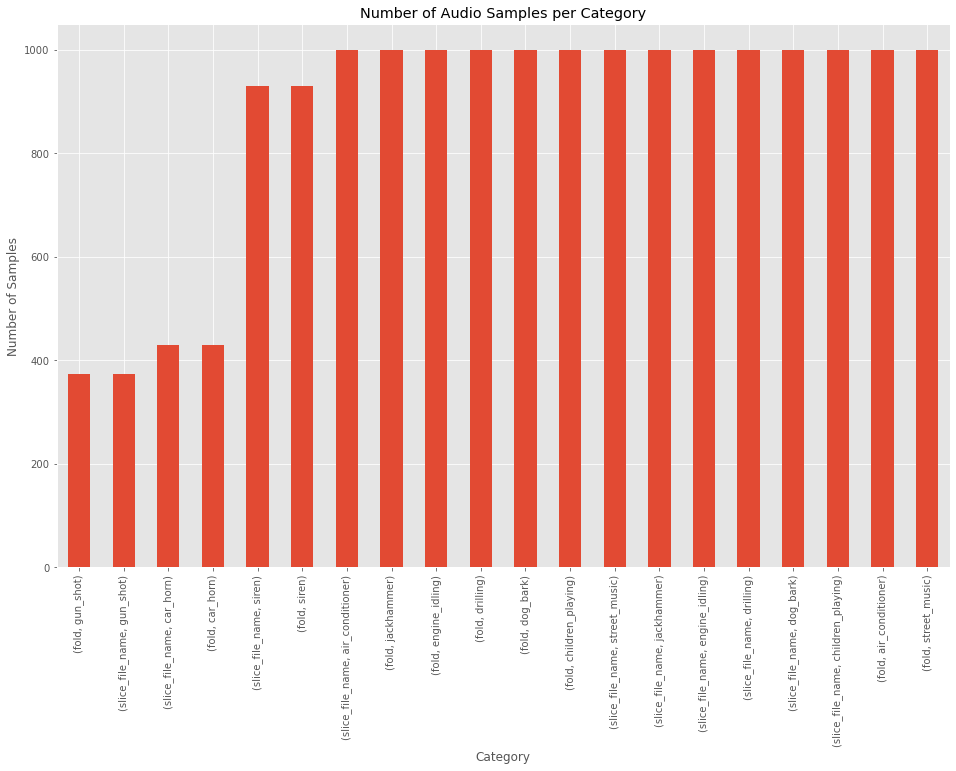

In [6]:
plot = category_.unstack().reindex(category_.unstack().sort_values().index)\
          .plot(kind='bar', stacked=False, title="Number of Audio Samples per Category", figsize=(16,10))
plot.set_xlabel("Category")
plot.set_ylabel("Number of Samples");


In [7]:
df =  meta_data.drop(['fsID','fold','start', 'end', 'salience', 'classID'], axis = 1)
df.head()

,slice_file_name,class
0,100032-3-0-0.wav,dog_bark
1,100263-2-0-117.wav,children_playing
2,100263-2-0-121.wav,children_playing
3,100263-2-0-126.wav,children_playing
4,100263-2-0-137.wav,children_playing


In [8]:
cd = pd.DataFrame({'Class' :['air_conditioner','car_horn','children_playing','dog_bark','drilling','engine_idling',
                      'gun_shot','jackhammer','siren','street_music'], 
                   'Total Number' : [1000, 429, 1000, 1000,1000, 1000,374, 1000, 929,1000]})

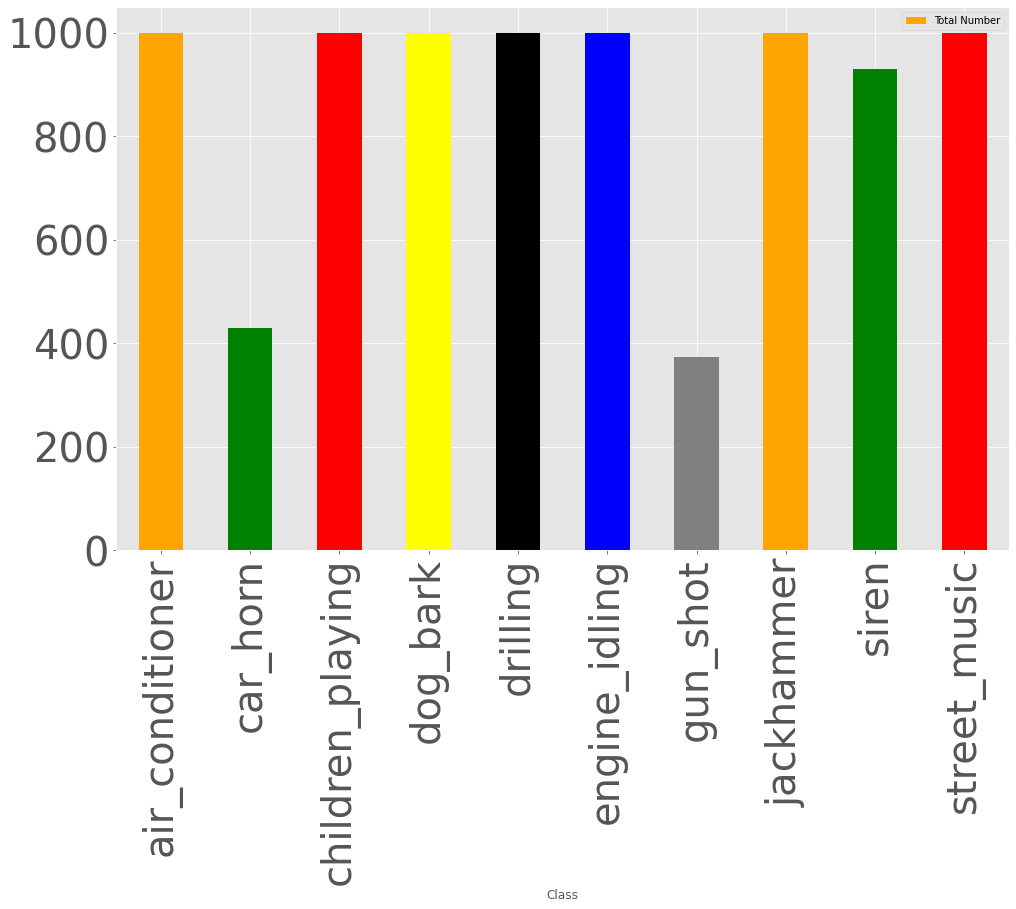

In [9]:
cv = cd.plot.bar(x = 'Class', y = 'Total Number', figsize = (16, 10), color = ['orange', 'green', 'red', 'yellow', 'black', 'blue', 'gray'], fontsize = 40)
plt.savefig('ffg.png', dpi =300)

In [10]:
print(f"Total Training Data: {meta_data.shape[0]} \n Number of classes = {len(meta_data['class'].unique())}")

Total Training Data: 8732 
 Number of classes = 10


In [11]:
print(meta_data['class'].unique())

['dog_bark' 'children_playing' 'car_horn' 'air_conditioner' 'street_music'
 'gun_shot' 'siren' 'engine_idling' 'jackhammer' 'drilling']


In [12]:
category_group = meta_data.groupby(['fold','class','classID']).count()
category_group[:60]

slice_file_name  fsID  start  end  salience
fold class            classID                                             
1    air_conditioner  0                    100   100    100  100       100
     car_horn         1                     36    36     36   36        36
     children_playing 2                    100   100    100  100       100
     dog_bark         3                    100   100    100  100       100
     drilling         4                    100   100    100  100       100
     engine_idling    5                     96    96     96   96        96
     gun_shot         6                     35    35     35   35        35
     jackhammer       7                    120   120    120  120       120
     siren            8                     86    86     86   86        86
     street_music     9                    100   100    100  100       100
2    air_conditioner  0                    100   100    100  100       100
     car_horn         1                     42    42     42   42        42
     children_playing 2                    100   100    100  100       100
     dog_bark         3                    100   100    100  100       100
     drilling         4                    100   100    100  100       100
     engine_idling    5                    100   100    100  100       100
     gun_shot         6                     35    35     35   35        35
     jackhammer       7                    120   120    120  120       120
     siren            8                     91    91     91   91        91
     street_music     9                    100   100    100  100       100
3    air_conditioner  0                    100   100    100  100       100
     car_horn         1                     43    43     43   43        43
     children_playing 2                    100   100    100  100       100
     dog_bark         3                    100   100    100  100       100
     drilling         4                    100   100    100  100       100
     engine_idling    5                    107   107    107  107       107
     gun_shot         6                     36    36     36   36        36
     jackhammer       7                    120   120    120  120       120
     siren            8                    119   119    119  119       119
     street_music     9                    100   100    100  100       100
4    air_conditioner  0                    100   100    100  100       100
     car_horn         1                     59    59     59   59        59
     children_playing 2                    100   100    100  100       100
     dog_bark         3                    100   100    100  100       100
     drilling         4                    100   100    100  100       100
     engine_idling    5                    107   107    107  107       107
     gun_shot         6                     38    38     38   38        38
     jackhammer       7                    120   120    120  120       120
     siren            8                    166   166    166  166       166
     street_music     9                    100   100    100  100       100
5    air_conditioner  0                    100   100    100  100       100
     car_horn         1                     98    98     98   98        98
     children_playing 2                    100   100    100  100       100
     dog_bark         3                    100   100    100  100       100
     drilling         4                    100   100    100  100       100
     engine_idling    5                    107   107    107  107       107
     gun_shot         6                     40    40     40   40        40
     jackhammer       7                    120   120    120  120       120
     siren            8                     71    71     71   71        71
     street_music     9                    100   100    100  100       100
6    air_conditioner  0                    100   100    100  100       100
     car_horn         1                     28    28    

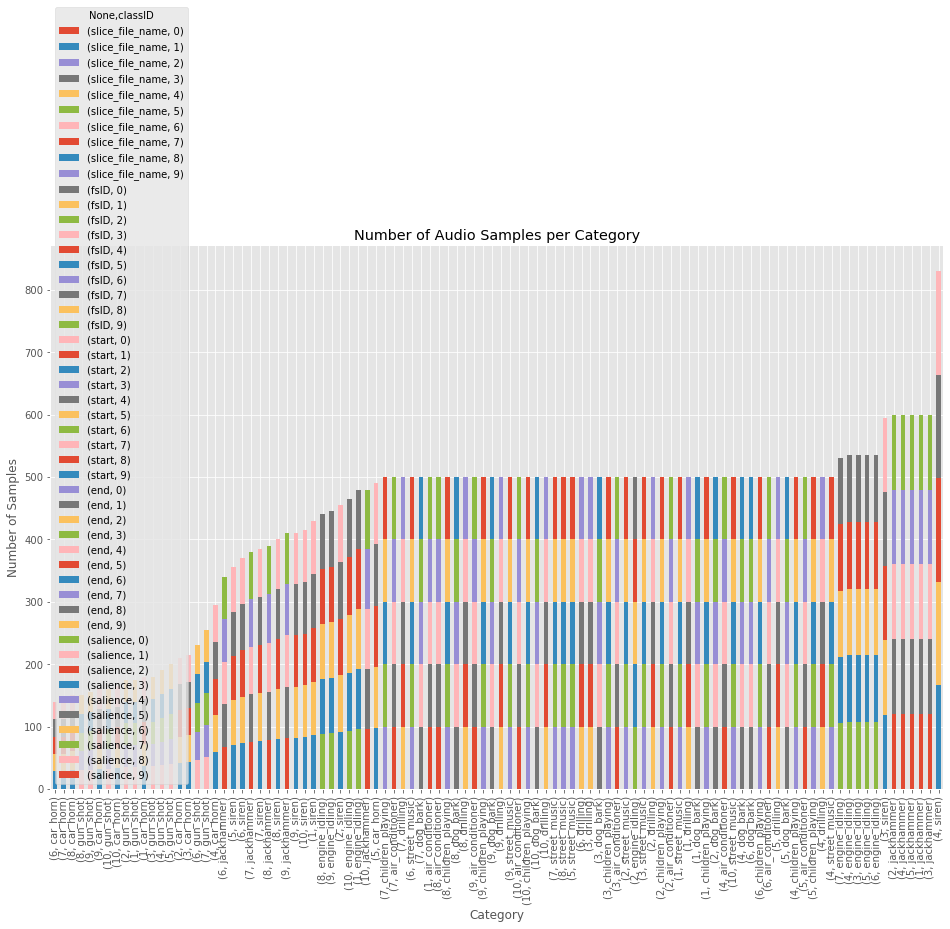

In [13]:
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
          .plot(kind='bar', stacked=True, title="Number of Audio Samples per Category", figsize=(16,10))
plot.set_xlabel("Category")
plot.set_ylabel("Number of Samples");


In [14]:
import librosa
import IPython.display as ipd  # To play sound in the notebook

In [15]:
###Audo Directory
Data_dir = "E:/Urban Sound/Data/"

In [16]:
fname1 = Data_dir + 'fold6/' + '111386-5-1-2.wav'
fname2 = Data_dir + 'fold10/' + '100648-1-0-0.wav'
fname3 = Data_dir + 'fold5/' + '100032-3-0-0.wav'   ###dog
fname4 = Data_dir + 'fold6/' + '111386-5-1-2.wav'

In [17]:
ipd.Audio(fname1)

In [18]:
audio, sr = librosa.core.load(fname3, sr= 16000, duration= 2,res_type='kaiser_fast',mono = True)
print(audio)
print(len(audio))

[-0.00303536 -0.00518135 -0.00471488 ... -0.00321284 -0.00203863
  0.        ]
5081


In [19]:
audio, sr = librosa.load(fname3, sr= 16000,res_type='kaiser_fast',mono = True)
print(audio)
print(len(audio))

[-0.00303536 -0.00518135 -0.00471488 ... -0.00321284 -0.00203863
  0.        ]
5081


In [20]:
ipd.Audio(fname3)

In [21]:
#ipd.Audio(fname4)

In [22]:
##Audio Normalization
def audio_normalization(data):
    max_data = np.max(data)
    min_data = np.min(data)
    data = (data-min_data)/(max_data-min_data+1e-6)
    return data-0.5

In [23]:
def read_audio_file(wav_file,duration = 2,target_sr =16000):
    input_length = target_sr * duration
    audio, sr = librosa.load(wav_file, sr= target_sr, duration= 2,res_type='kaiser_fast',mono = True)
    dur = librosa.get_duration(audio, input_length)
    audio = librosa.util.fix_length(audio,input_length)
    audio = audio_normalization(audio)
    return audio

xx__ = (read_audio_file(fname3))
print(xx__)
print(xx__.shape)

[-0.00449204 -0.00566456 -0.00540966 ... -0.00283358 -0.00283358
 -0.00283358]
(32000,)


In [24]:
import librosa
import numpy as np
import scipy
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras.layers import (Convolution1D, Dense, Dropout, GlobalAveragePooling1D, 
                          GlobalMaxPool1D, Input, MaxPool1D, concatenate)
from keras.utils import Sequence, to_categorical

In [25]:
X_data =[]
Y_data = []

x_test =[]
y_test =[]

def convert_data(Data_dir,sampling_rate=16000, audio_duration = 2):
    input_length = sampling_rate * audio_duration
    for i in range(8732):
        file_name = Data_dir + '/fold' + str(meta_data['fold'][i]) + '/' + meta_data["slice_file_name"][i]
        # Here kaiser_fast is a technique used for faster extraction
        audio, sample_rate = librosa.load(file_name, sr= sampling_rate, duration= audio_duration,
                                          res_type='kaiser_fast',mono = True)
        audio = librosa.util.fix_length(audio,input_length)
        audio = audio_normalization(audio)
        
        if (meta_data['fold'][i] == 10):
            x_test.append(audio)
            y_test.append(meta_data['classID'][i])
        else:
            X_data.append(audio)
            Y_data.append(meta_data['classID'][i])
           

        

    

In [26]:
%%time
convert_data(Data_dir)

Wall time: 10min 43s


In [27]:
print("X-data: ",X_data)

X-data:  [array([-0.00449204, -0.00566456, -0.00540966, ..., -0.00283358,
       -0.00283358, -0.00283358], dtype=float32), array([ 0.03330737,  0.05431598,  0.02495855, ..., -0.00272897,
       -0.03184724, -0.01181453], dtype=float32), array([-0.05397558, -0.06663331, -0.01403132, ..., -0.0427573 ,
       -0.0118469 ,  0.02909887], dtype=float32), array([ 0.00690198, -0.00766701, -0.03864563, ..., -0.0891045 ,
       -0.04231086,  0.03045201], dtype=float32), array([ 0.05291826,  0.19506139,  0.22377837, ..., -0.14403158,
       -0.19616035, -0.14468616], dtype=float32), array([0.09365165, 0.23004884, 0.15549618, ..., 0.04915041, 0.06080151,
       0.05865407], dtype=float32), array([ 0.01246971, -0.04772136,  0.01214623, ..., -0.02180517,
       -0.0500294 , -0.0593349 ], dtype=float32), array([0.10777706, 0.16558176, 0.12806547, ..., 0.0748961 , 0.04088122,
       0.01626962], dtype=float32), array([-0.10660508, -0.10268256, -0.04865715, ..., -0.1638776 ,
       -0.10556427, -0.086

In [28]:
print("Y-data: ",Y_data)

Y-data:  [3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 5, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 

In [29]:
print("X-test: ",x_test)

X-test:  [array([-0.02804682, -0.02804682, -0.02804682, ..., -0.02804682,
       -0.02804682, -0.02804682], dtype=float32), array([0.01720518, 0.01720518, 0.01720518, ..., 0.01720518, 0.01720518,
       0.01720518], dtype=float32), array([8.8095665e-05, 8.8095665e-05, 8.8095665e-05, ..., 8.8095665e-05,
       8.8095665e-05, 8.8095665e-05], dtype=float32), array([-0.01578602, -0.01578602, -0.01578602, ..., -0.01578602,
       -0.01578602, -0.01578602], dtype=float32), array([-0.00251761, -0.00251761, -0.00251761, ..., -0.00251761,
       -0.00251761, -0.00251761], dtype=float32), array([0.01840842, 0.01840842, 0.01840842, ..., 0.0203265 , 0.02084345,
       0.02009869], dtype=float32), array([0.00418693, 0.00418693, 0.00418693, ..., 0.00719452, 0.0073089 ,
       0.00682402], dtype=float32), array([0.00760663, 0.00610656, 0.00489962, ..., 0.00780016, 0.00823396,
       0.0083763 ], dtype=float32), array([0.01135027, 0.01169783, 0.0121249 , ..., 0.01493353, 0.02028292,
       0.02250862]

In [30]:
print("y-test: ",y_test)

y-test:  [1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 3, 3, 9, 9, 9, 9, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5, 5, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9, 9, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [31]:
%%time
X_data = np.array(X_data)
Y_data = np.array(Y_data)
x_test = np.array(x_test)
y_test = np.array(y_test)

Wall time: 2min 9s


In [32]:
print(f"X_data Shape: {X_data.shape}")
print(f"X_data dim: {X_data.ndim}")
print(f"Y_data Shape: {Y_data.shape}")
print(f"Y_data dim: {Y_data.ndim}")
print(f"x_test Shape: {x_test.shape}")
print(f"x_test dim: {x_test.ndim}")
print(f"y_test Shape: {y_test.shape}")
print(f"y_test dim: {y_test.ndim}")

X_data Shape: (7895, 32000)
X_data dim: 2
Y_data Shape: (7895,)
Y_data dim: 1
x_test Shape: (837, 32000)
x_test dim: 2
y_test Shape: (837,)
y_test dim: 1


In [33]:
len(X_data)

7895

In [34]:
X_data = X_data.reshape(7895,32000,1)
X_data.shape

(7895, 32000, 1)

In [35]:
X_data[2]

array([[-0.05397558],
       [-0.06663331],
       [-0.01403132],
       ...,
       [-0.0427573 ],
       [-0.0118469 ],
       [ 0.02909887]], dtype=float32)

In [36]:
x_test =  x_test.reshape(837,32000,1)

In [37]:
%%time
import seaborn as sns
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
import keras
from keras import losses, models, optimizers
from keras.activations import relu, softmax,sigmoid
from keras import regularizers
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras.layers import (Convolution1D, Dense, Dropout, GlobalAveragePooling1D, SeparableConv1D,
                          GlobalMaxPool1D, Input, MaxPool1D, concatenate)
from keras.utils import Sequence, to_categorical
import warnings
warnings.filterwarnings("ignore")

print("Package Done!")


Package Done!
Wall time: 719 ms
Parser   : 354 ms


In [38]:
%%time
seed = 1000
X_TRAIN, X_VAL, Y_TRAIN, Y_VAL = train_test_split(X_data,Y_data,train_size=0.90,random_state = seed,shuffle = True)

Wall time: 1min


In [39]:
print(f"Train Data Shape: {X_TRAIN.shape}\nTrain Label Shape: {Y_TRAIN.shape}\n")
print(f"Validation Data Shape: {X_VAL.shape}\nValidation Label Shape: {Y_VAL.shape}\n")
print(f"Test Data Shape: {x_test.shape}\nTrain Label Shape: {y_test.shape}\n")
print(f"Total Train and Validation Data: {len(X_TRAIN) + len(X_VAL)}")
print(f"Total Train, Validation and Test  Data: {len(X_TRAIN) + len(X_VAL) + len(x_test)} \n")

Train Data Shape: (7105, 32000, 1)
Train Label Shape: (7105,)

Validation Data Shape: (790, 32000, 1)
Validation Label Shape: (790,)

Test Data Shape: (837, 32000, 1)
Train Label Shape: (837,)

Total Train and Validation Data: 7895
Total Train, Validation and Test  Data: 8732 



In [40]:
NB_CLASS =len (meta_data['class'].unique())
NB_CLASS

10

In [41]:
print(Y_TRAIN)
print(Y_TRAIN.shape)

[3 1 7 ... 0 5 9]
(7105,)


In [42]:
Y_TRAIN = np.array(keras.utils.to_categorical(Y_TRAIN, NB_CLASS))
print(Y_TRAIN[0:10])
print(Y_TRAIN.shape)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(7105, 10)


In [43]:
print(Y_VAL)
print(Y_VAL.shape)

[3 6 4 3 1 8 5 5 9 5 9 1 4 5 3 5 0 5 7 2 2 5 0 0 9 2 0 5 9 9 9 9 4 8 8 3 9
 0 8 3 2 4 6 3 6 4 4 2 2 4 4 0 0 3 7 5 2 8 0 9 5 9 5 0 5 9 8 2 3 0 0 5 6 6
 9 7 9 1 3 9 2 8 2 9 3 6 3 2 4 4 2 9 9 3 3 3 1 9 3 4 4 2 5 2 0 3 4 1 9 9 7
 4 9 7 2 3 2 5 6 9 5 4 5 5 2 6 5 4 4 1 8 8 8 3 4 7 0 9 7 0 2 4 9 7 9 2 5 3
 0 1 8 8 1 7 4 0 5 5 6 1 4 2 4 0 4 5 4 1 4 0 3 9 5 4 4 9 1 5 0 2 3 1 7 3 8
 2 9 0 8 2 6 8 5 5 0 9 3 1 0 2 5 7 0 4 5 3 0 4 4 2 9 0 7 7 2 1 5 3 2 7 9 9
 1 9 7 7 4 5 8 3 1 3 5 4 7 3 1 7 8 9 0 9 5 5 8 1 7 3 3 0 9 6 0 7 7 8 8 8 8
 3 0 4 8 2 4 2 5 4 5 9 2 8 0 1 5 1 2 5 3 7 1 3 4 7 4 9 2 7 3 8 2 2 0 6 0 0
 5 4 7 4 7 7 8 9 9 0 8 4 5 2 6 3 5 6 9 2 2 3 2 5 0 7 0 5 3 0 8 0 9 5 3 0 4
 0 6 9 6 3 6 4 8 4 4 9 7 4 0 2 4 7 6 1 3 9 4 5 4 3 1 7 0 7 7 8 9 4 9 0 8 7
 9 5 7 4 5 7 8 7 8 3 6 0 0 9 8 8 2 3 3 0 4 8 7 4 8 4 5 5 0 0 9 3 8 0 8 0 4
 7 5 7 1 3 6 9 9 2 3 0 9 0 8 6 9 3 9 3 0 1 4 8 4 3 0 5 8 3 3 7 1 7 1 4 5 5
 9 8 9 8 2 4 0 7 1 2 7 4 7 8 7 9 0 9 8 0 1 9 7 9 7 2 3 9 8 7 8 1 1 3 3 2 8
 0 0 7 3 0 5 4 3 9 1 4 4 

In [44]:
Y_VAL = np.array(keras.utils.to_categorical(Y_VAL, NB_CLASS))
print(Y_VAL)
print(Y_VAL.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(790, 10)


In [45]:
print(y_test)
print(y_test.shape)

[1 1 1 1 1 3 3 3 3 2 2 2 2 2 2 2 2 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 9 9 9 9 9 9 9 9 9 9 9 9 9 3 3 9
 9 9 9 9 9 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 0 0 0 3 3 3 3 3
 3 3 3 2 2 2 2 2 2 2 2 9 9 9 9 9 9 9 9 9 9 9 9 5 5 3 3 3 3 3 2 2 2 2 2 2 2
 2 4 9 9 9 9 9 9 9 9 9 9 9 9 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 3 3 2 2 2 2 2 2
 2 2 9 9 9 9 9 9 9 6 8 8 8 8 8 8 8 8 8 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 4 4 4 4 6 1 1 9 9 9 9 9 9 9 9 9 9 9 9 9 6 6 6 6 6 6 6
 3 3 3 1 1 7 7 7 7 7 7 7 7 7 7 1 2 2 2 2 2 2 2 2 1 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 4 4 4 4 4 4 2 2
 2 2 2 2 2 2 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [46]:
Y_TEST = np.array(keras.utils.to_categorical(y_test, NB_CLASS))
print(Y_TEST)
print(Y_TEST.shape)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(837, 10)


In [47]:
print ("label shape: ", Y_data.shape)
print ("data size of the array: : %s" % Y_data.size)
print ("length of one array element in bytes: ", Y_data.itemsize)
print ("total bytes consumed by the elements of the array: ",Y_data.nbytes)
print (Y_data[1])
print ("")
print ("audio data shape: ", X_data.shape)
print ("data size of the array: : %s" % X_data.size)
print ("length of one array element in bytes: ", X_data.itemsize)
print ("total bytes consumed by the elements of the array: ", X_data.nbytes)
#print (x_data[1])
print ("")
print ("training data shape: ", X_TRAIN.shape)
print ("training label shape: ", Y_TRAIN.shape)
print ("")
print ("validation data shape: ", X_VAL.shape)
print ("validation label shape: ", Y_VAL.shape)
print ("")
print ("test data shape: ", x_test.shape)
print ("test label shape: ", Y_TEST.shape)
print ("")

label shape:  (7895,)
data size of the array: : 7895
length of one array element in bytes:  8
total bytes consumed by the elements of the array:  63160
2

audio data shape:  (7895, 32000, 1)
data size of the array: : 252640000
length of one array element in bytes:  4
total bytes consumed by the elements of the array:  1010560000

training data shape:  (7105, 32000, 1)
training label shape:  (7105, 10)

validation data shape:  (790, 32000, 1)
validation label shape:  (790, 10)

test data shape:  (837, 32000, 1)
test label shape:  (837, 10)



In [48]:
input_length = 32000

inp = Input(shape=(32000,1))
inp.shape

TensorShape([None, 32000, 1])

In [49]:
print( " Raw Audio Model Using CNN")

x = Convolution1D(16, 3, activation=relu, padding="valid") (inp)
#x = Convolution1D(16, 3, activation=relu, padding="valid")(x)
x = MaxPool1D(20)(x)
x = Dropout(rate=0.2)(x)

x = Convolution1D(32, 4, activation=relu, padding="valid")(x)
#x = Convolution1D(32, 6, activation=relu, padding="valid")(x)
x = MaxPool1D(30)(x)
x = Dropout(rate=0.3)(x)

#x = Convolution1D(32, 3, activation=relu, padding="valid")(x)
#x = Convolution1D(32, 3, activation=relu, padding="valid")(x)
#x = MaxPool1D(4)(x)
#x = Dropout(rate=0.1)(x)

x = Convolution1D(64, 9, activation=relu, padding="valid")(x)
#x = Convolution1D(64, 9, activation=relu, padding="valid")(x)
x = MaxPool1D(4)(x)
x = Dropout(rate=0.4)(x)

x = Convolution1D(128, 3, activation=relu, padding="valid")(x)
#x = Convolution1D(128, 3, activation=relu, padding="valid")(x)
x = GlobalMaxPool1D()(x)
x = Dropout(rate=0.5)(x)

#model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
x = Dense(16,kernel_regularizer=regularizers.l2(0.001),activation=relu) (x)
x = Dense(16,kernel_regularizer=regularizers.l2(0.001),activation=relu) (x)
x = Dense(64, activation=relu)(x)
x = Dense(64, activation=relu)(x)
out = Dense(NB_CLASS, activation=sigmoid)(x)


model = models.Model(inputs=inp, outputs=out)
opt = optimizers.Adam(0.003)

model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['acc'])

model.summary()


 Raw Audio Model Using CNN
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32000, 1)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 31998, 16)         64        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1599, 16)          0         
_________________________________________________________________
dropout (Dropout)            (None, 1599, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1596, 32)          2080      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 53, 32)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None

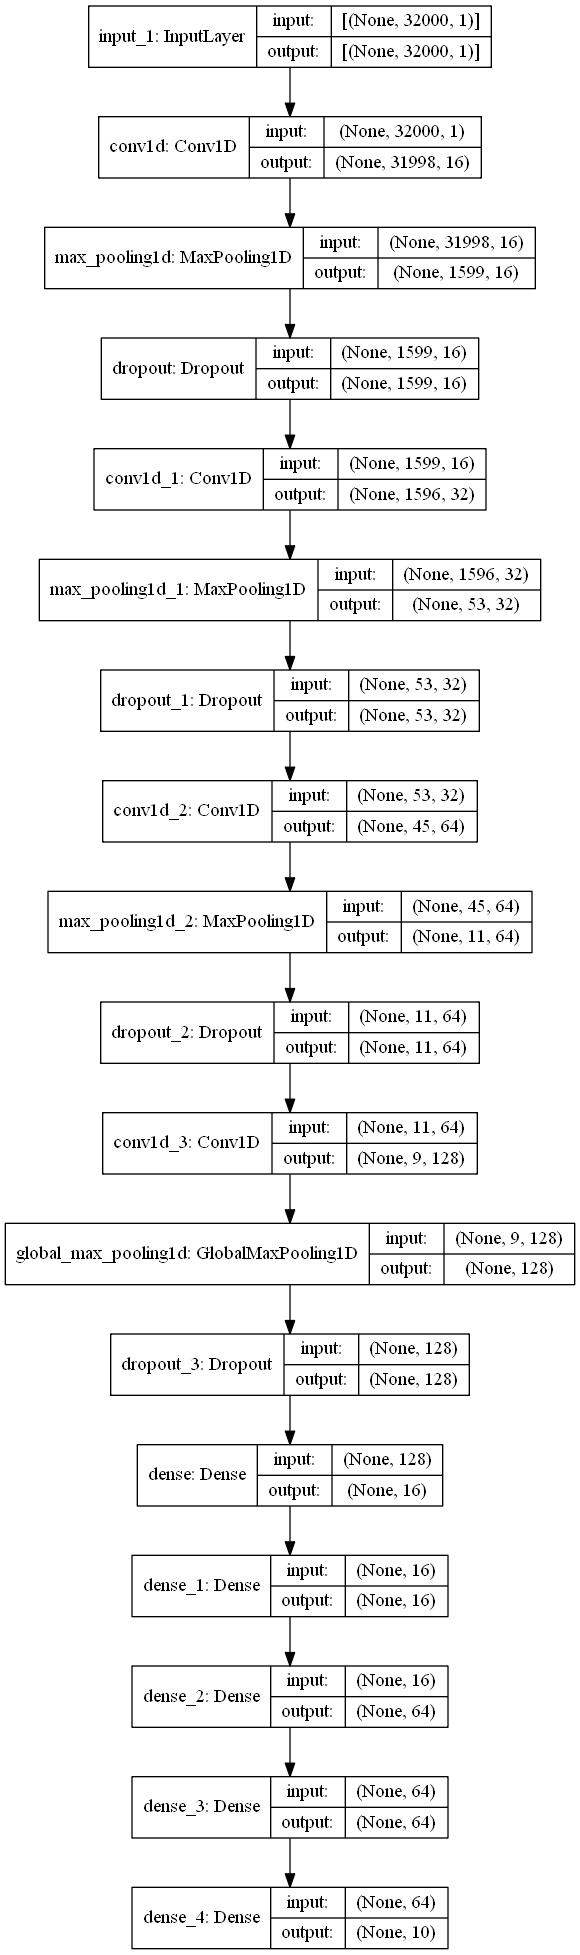

In [50]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

In [51]:
%%time
# saved model checkpoint file

#train_model_file=file_path+"/checkpoints/weights.best_{epoch:02d}-{loss:.2f}.hdf5"
MAX_PATIENT=11
MAX_EPOCHS=250
MAX_BATCH=128


checkpoint = ModelCheckpoint('best_CNN.h5', monitor='val_loss', verbose=1, save_best_only=True)
early = EarlyStopping(monitor="val_loss", mode="min", patience=MAX_PATIENT)
ReduceLR = ReduceLROnPlateau(monitpr = 'val_loss',factor=0.1,patience=3, verbose=1)
#tb = TensorBoard(log_dir= './logs/', write_graph=True)

callbacks_list = [checkpoint,ReduceLR, early]
# callbacks
# removed EarlyStopping(patience=MAX_PATIENT)
#callback=[ReduceLROnPlateau(patience=MAX_PATIENT, verbose=1),
          #ModelCheckpoint(filepath=best_CNN_model_file, monitor='loss', verbose=1, save_best_only=True)]

print ("training started..... please wait.")
# training
history=model.fit(X_TRAIN, Y_TRAIN, 
                  batch_size=MAX_BATCH, 
                  epochs=MAX_EPOCHS,
                  verbose=1,
                  validation_data=(X_VAL, Y_VAL),
                  callbacks=callbacks_list
                 ) 
                 

print ("training finised!")


training started..... please wait.
Epoch 1/250
56/56 [==============================] - 303s 4s/step - loss: 2.2527 - acc: 0.1438 - val_loss: 2.2892 - val_acc: 0.1582

Epoch 00001: val_loss improved from inf to 2.28921, saving model to best_CNN.h5
Epoch 2/250
56/56 [==============================] - 67s 1s/step - loss: 2.0031 - acc: 0.2449 - val_loss: 2.0472 - val_acc: 0.2405

Epoch 00002: val_loss improved from 2.28921 to 2.04722, saving model to best_CNN.h5
Epoch 3/250
56/56 [==============================] - 51s 917ms/step - loss: 1.8548 - acc: 0.3165 - val_loss: 1.9426 - val_acc: 0.3063

Epoch 00003: val_loss improved from 2.04722 to 1.94263, saving model to best_CNN.h5
Epoch 4/250
56/56 [==============================] - 50s 887ms/step - loss: 1.6990 - acc: 0.3994 - val_loss: 1.7777 - val_acc: 0.3772

Epoch 00004: val_loss improved from 1.94263 to 1.77772, saving model to best_CNN.h5
Epoch 5/250
56/56 [==============================] - 50s 900ms/step - loss: 1.6558 - acc: 0.4130 -

56/56 [==============================] - 52s 921ms/step - loss: 1.1567 - acc: 0.6034 - val_loss: 1.1686 - val_acc: 0.5759

Epoch 00040: val_loss did not improve from 1.16685
Epoch 41/250
56/56 [==============================] - 53s 947ms/step - loss: 1.1564 - acc: 0.5994 - val_loss: 1.1686 - val_acc: 0.5759

Epoch 00041: val_loss did not improve from 1.16685

Epoch 00041: ReduceLROnPlateau reducing learning rate to 3.000000106112566e-08.
Epoch 42/250
56/56 [==============================] - 51s 904ms/step - loss: 1.1253 - acc: 0.6218 - val_loss: 1.1686 - val_acc: 0.5759

Epoch 00042: val_loss did not improve from 1.16685
Epoch 43/250
56/56 [==============================] - 49s 877ms/step - loss: 1.1578 - acc: 0.6058 - val_loss: 1.1686 - val_acc: 0.5759

Epoch 00043: val_loss did not improve from 1.16685
training finised!
Wall time: 42min 35s
Parser   : 222 ms


In [52]:
%%time
# Keras reported accuracy:
score = model.evaluate(X_TRAIN, Y_TRAIN, verbose=0) 
print ("model train data score       : ",round(score[1]*100) , "%")

score = model.evaluate(X_VAL, Y_VAL, verbose=0) 
print ("model validation data score  : ", round(score[1]*100), "%")

score = model.evaluate(x_test, Y_TEST, verbose=0) 
print ("model Test data score   : ", round(score[1]*100), "%")

model train data score       :  60 %
model validation data score  :  58 %
model Test data score   :  52 %
Wall time: 28.7 s
Parser   : 311 ms


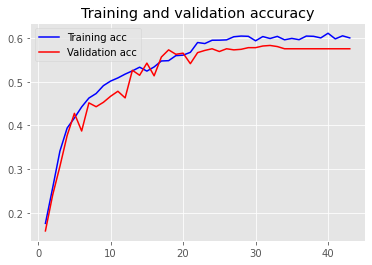

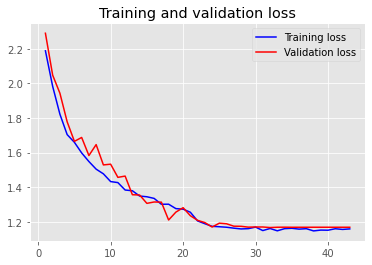

In [53]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [54]:
x = Convolution1D(16, 3, activation=relu, padding="valid") (inp)
x = MaxPool1D(20)(x)
x = Dropout(rate=0.2)(x)

x = Convolution1D(64, 9, activation=relu, padding="valid")(x)
x = MaxPool1D(4)(x)
x = Dropout(rate=0.4)(x)

x = Convolution1D(128, 3, activation=relu, padding="valid")(x)
#x = Convolution1D(128, 3, activation=relu, padding="valid")(x)
x = GlobalMaxPool1D()(x)
x = Dropout(rate=0.5)(x)

x = Dense(16,kernel_regularizer=regularizers.l2(0.001),activation=relu) (x)
x = Dense(64, activation=relu)(x)
out = Dense(NB_CLASS, activation=sigmoid)(x)

model = models.Model(inputs=inp, outputs=out)
opt = optimizers.Adam(0.003)

model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['acc'])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32000, 1)]        0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 31998, 16)         64        
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1599, 16)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1599, 16)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 1591, 64)          9280      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 397, 64)           0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 397, 64)           0   

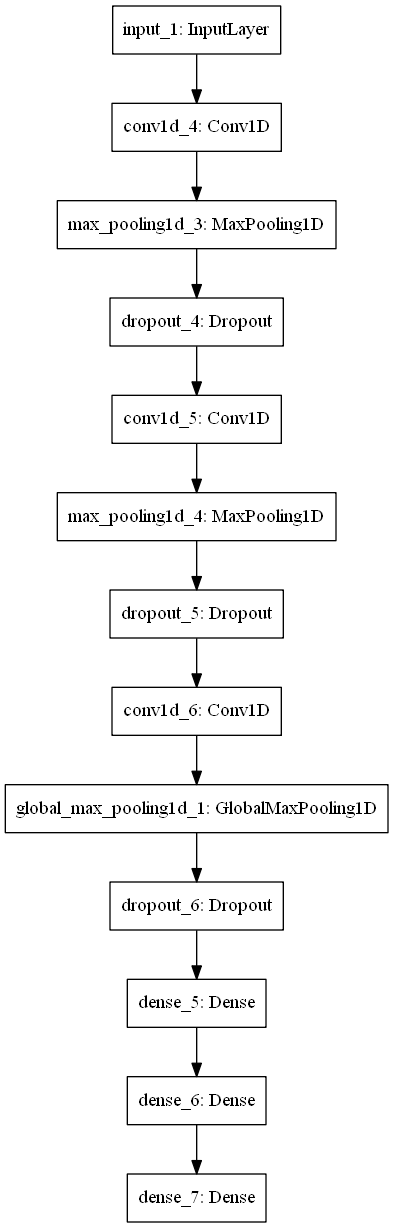

In [55]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file = 'model_plot.png', show_shapes = False, show_layer_names = True)

In [56]:
%%time
# saved model checkpoint file

#train_model_file=file_path+"/checkpoints/weights.best_{epoch:02d}-{loss:.2f}.hdf5"
MAX_PATIENT=11
MAX_EPOCHS=100
MAX_BATCH=64


checkpoint = ModelCheckpoint('best_CNN.h5', monitor='val_loss', verbose=1, save_best_only=True)
early = EarlyStopping(monitor="val_loss", mode="min", patience=MAX_PATIENT)
ReduceLR = ReduceLROnPlateau(monitpr = 'val_loss',factor=0.1,patience=3, verbose=1)
#tb = TensorBoard(log_dir= './logs/', write_graph=True)

callbacks_list = [checkpoint,ReduceLR, early]
# callbacks
# removed EarlyStopping(patience=MAX_PATIENT)
#callback=[ReduceLROnPlateau(patience=MAX_PATIENT, verbose=1),
          #ModelCheckpoint(filepath=best_CNN_model_file, monitor='loss', verbose=1, save_best_only=True)]

print ("training started..... please wait.")
# training
history=model.fit(X_TRAIN, Y_TRAIN, 
                  batch_size=MAX_BATCH, 
                  epochs=MAX_EPOCHS,
                  verbose=1,
                  validation_data=(X_VAL, Y_VAL),
                  callbacks=callbacks_list
                 ) 
                 

print ("training finised!")


training started..... please wait.
Epoch 1/100
112/112 [==============================] - 76s 642ms/step - loss: 2.2609 - acc: 0.1221 - val_loss: 2.0865 - val_acc: 0.1924

Epoch 00001: val_loss improved from inf to 2.08654, saving model to best_CNN.h5
Epoch 2/100
112/112 [==============================] - 69s 619ms/step - loss: 2.0126 - acc: 0.2476 - val_loss: 1.8975 - val_acc: 0.2557

Epoch 00002: val_loss improved from 2.08654 to 1.89750, saving model to best_CNN.h5
Epoch 3/100
112/112 [==============================] - 69s 619ms/step - loss: 1.8482 - acc: 0.3061 - val_loss: 1.8512 - val_acc: 0.3025

Epoch 00003: val_loss improved from 1.89750 to 1.85121, saving model to best_CNN.h5
Epoch 4/100
112/112 [==============================] - 70s 624ms/step - loss: 1.8136 - acc: 0.3317 - val_loss: 1.7790 - val_acc: 0.3924

Epoch 00004: val_loss improved from 1.85121 to 1.77898, saving model to best_CNN.h5
Epoch 5/100
112/112 [==============================] - 70s 621ms/step - loss: 1.7100 

In [57]:
%%time
# Keras reported accuracy:
score = model.evaluate(X_TRAIN, Y_TRAIN, verbose=0) 
print ("model train data score       : ",round(score[1]*100) , "%")

score = model.evaluate(X_VAL, Y_VAL, verbose=0) 
print ("model validation data score  : ", round(score[1]*100), "%")

score = model.evaluate(x_test, Y_TEST, verbose=0) 
print ("model Test data score   : ", round(score[1]*100), "%")

model train data score       :  29 %
model validation data score  :  30 %
model Test data score   :  30 %
Wall time: 27.4 s


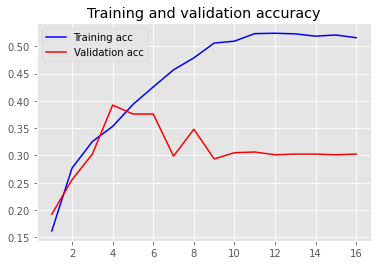

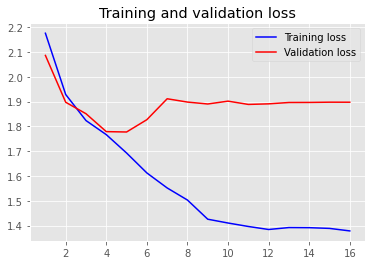

In [58]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()